In [1]:
 # Road traffic simulation using cellula automata descibed in Nagel, K., Schreckenberg, M. (1992).
    # Epebinu Abayomi Dennis

In [2]:
import numpy as np
import scipy as sp
import random

In [3]:
#Part 1 Traffic jams on a road
#    Implement the single lane, variable speed traffic model described in this paper:
#    Nagel, K., Schreckenberg, M. (1992)'
#    A cellular automaton model for freeway traffic. Journal de Physique I, 2(12), 2221–2229.

#1. Visualize the state of this model over time, to show how traffic jams can appear when traffic density 
#   is high enough.

#2. Analyze how the overall average traffic flow rate varies with traffic density and
#  present your results in your report.

In [4]:
# (road length, traffic density, maximum velocity, probability of slowing down)
class TrafficSimulation:
    
    def __init__(self, road_length = 100, density = 0.2, max_velocity = 5, slow_prob = 0.3):
        self.road_length = road_length
        self.density = density
        self.max_velocity = max_velocity
        self.slow_prob = slow_prob
        self.flow_count = 0 #set up a counter of how many cars exit and enter the road from the left side at each update
        
        
        self.state = -sp.ones(100, dtype=int)
        for i in range(100):
            if random.random() <= self.density:
                self.state[i] = random.randint(0,5)
        
        
    def update(self):
        m = self.max_velocity
        next_state = -sp.ones(100, dtype=int)
        
        
        #find all the cars' indice
        current_index = np.argwhere(self.state!=-1)
        num_cars = len(current_index)
    
        for i in range(num_cars):
        #the index of interest now and the next one
            c = current_index[i]
            n = current_index[(i+1) % len(current_index)]
            v = self.state[c]
            
            #calculate the distance between two cars
            dist = (n-c)%100 
             
            #accelearation
            if v < m and dist >= v+1:
                v = v + 1
                 
            #slowing down /deceleration
            if v > 0 and dist <= v :
                v = dist - 1
                 
            #randomization            
            if v > 0 and random.random() <= self.slow_prob:
                v = v - 1
            
            #update the speed after movement 
            next_state[(c + v) % 100] = v
            
            if c+v >= 100:
                self.flow_count += 1
            
        self.state = next_state
        #print(''.join('.' if x == -1 else str(x) for x in self.state))

        
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state))


In [5]:
random.seed(100)

Test1 = TrafficSimulation(density = 0.3)

t = 25 #time step
for i in range(t):
    Test1.update()
    Test1.display()

.1...3.0.....50..2...0.1...3.1...3...1......4...1.....4...20.0.........5.00......5..10.000.....5...3
1.1..0..1....0.1....30...2..1.1.....3..2.......3..2.....2.0.1.1........0.0.1.......20.100.1......2..
.1..2.1..1....1..2..0.1....2.1..2....1...2.......2..2....1.1.1..2......0..1..2.....0.100.1..2.....1.
...2.1..2.1.....2..20...2...1..2...3...2....3......2...3..1.1..2...3...0....2...3..0.00.1.1...2....1
.2..1..2.1..2.....20.1.....3..2...3..2....3.....4.....3.1.0...2...3...3.1.....2...2.10.10...2....3..
3..2..20...2...3..00..1......2..2...2...3....3......4..1.10......3...3.1..2......3.10.100.....2.....
.1...200.....2...20.1...2......2...3...3...3.....4...1..10.1.......2..1..2..2.....100.00.1.......3..
3..2.000........300..1....2.......3...3...3....4....3..20.1.1.......1..1...2...3..00.10.1..2........
.1.0.000........00.1..1......3.......3...3....4...3..1.0.1.1..2......1..1.....3.1.0.100...2..2......
.0.0.00.1.......0.1..2..2.......3.......3....4...3..2.1.1.1..2...3.....2.1.....1.1.1000....

<ipython-input-4-ecb72337f600>:12: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  self.state = -sp.ones(100, dtype=int)
<ipython-input-4-ecb72337f600>:20: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  next_state = -sp.ones(100, dtype=int)


In [6]:
random.seed(100)
#calculate the flow rate

flow_rate = []
densities = []
time_step = 25

for i in range(1,20): #loop through the densities
    p = 0.05*i
    densities.append(p) #density
    p_all_flow_rates = [] #store the flow rates of each simulation for one density
   
    for j in range(20): #repeat simulation each density for 20 times
        T = TrafficSimulation(density = p) #simulation
        for i in range(time_step): #time step = 200
            T.update()
        p_all_flow_rates.append(T.flow_count/float(time_step))
    
    #average flow rate for one density
    p_flow_rate = sum(p_all_flow_rates)/20.0
    flow_rate.append(p_flow_rate)


<ipython-input-4-ecb72337f600>:12: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  self.state = -sp.ones(100, dtype=int)
<ipython-input-4-ecb72337f600>:20: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  next_state = -sp.ones(100, dtype=int)


Text(0, 0.5, 'Flow rate')

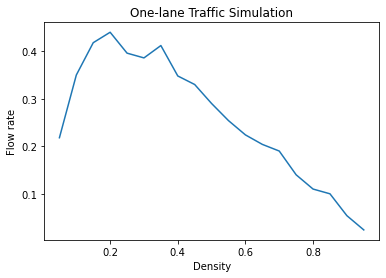

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(densities,flow_rate)
plt.title("One-lane Traffic Simulation")
plt.xlabel("Density")
plt.ylabel("Flow rate")

In [8]:
#Part 2: Multi-lane highways
# Implement the 2-lane, symmetric, uni-directional, variable speed model in this paper: 
# Rickert, M., et al. (1996). Two Lane Traffic Simulations using Cellular Automata. 

# parameters, and update rules of the model?  


#Visualize the state of this model over time, to show the typical traffic patterns that can emerge. 
#My results will again depend on traffic density.

#Analyze how much more traffic can flow through a multi-lane road, compare to a single lane road, 
#at the same traffic density. 


In [9]:
class TrafficSimulation_2lane:
    
    def __init__(self, road_length = 100, density = 0.2, max_velocity = 5, slow_prob = 0.3, lane_prob = 0.8):
        self.road_length = road_length
        self.density = density
        self.max_velocity = max_velocity
        self.slow_prob = slow_prob
        self.lane_prob = lane_prob
        self.flow_count = 0
        
        #Set up 2 empty lanes
        self.state1 = -sp.ones(100, dtype=int)
        self.state2 = -sp.ones(100, dtype=int)
    
        #Populate cars on the lanes according to initial probabilities
        for i in range(200):
            if random.random() <= self.density:
                if i<100:
                    self.state1[i] = random.randint(0,5)
                else:
                    self.state2[i-100] = random.randint(0,5)
        
    def update(self): 
        m = self.max_velocity
        
        next_state1 = -sp.ones(100, dtype=int)
        next_state2 = -sp.ones(100, dtype=int)

        #find all the cars' indice
        current_index1 = np.argwhere(self.state1!=-1)
        current_index2 = np.argwhere(self.state2!=-1)
        update_index1 = current_index1
        update_index2 = current_index2
                
        
        '''Determine if cars on lane #1 will change lanes '''
        for i in range(len(current_index1)):
            c = current_index1[i] #current cell index
            n1 = current_index1[(i+1) % len(current_index1)] #next cell index
            v = self.state1[c]
            
            #Symmetric model: a car only changes lanes when there's someone in front of it where gap < speed
            #Note that the gap equals distance - 
            if (n1-c)%100-1 >= v + 1: 
                break #doesn't change lanes
                
            #check if there's a car at the same index next lane, 
            if self.state2[c] >= 0 or (n1-c)%100 > v:
                break #doesn't change lanes

            #look back on the other lane
            for dx in range(1, m): 
                if self.state2[(c - dx)%100] >= 0: #there is a car behind on the other lane             
                    loback = False
                else: 
                    loback = True

            #find the car ahead in the other lane
            for dx in range(1, m):
                if self.state2[(c + dx)%100] >= 0: 
                    lo = dx - 1 #the neighborhood ahead has a car
                    break
                else:
                    lo = m - 1 #the neighborhood ahead is empty

            #change lanes
            if loback == True and lo >= v and random.random()<= self.lane_prob:
                
                #find the current cell index in the list of car indices
                c_index = np.argwhere(update_index1 == c)
                #delete the index from car indices the original lane  
                new_index1 = np.delete(update_index1, c_index)
                #because numpy array is immutable
                update_index1 = new_index1

                #add the index to the destination lane
                update_index2 = update_index2.flatten()
                #find the correct index to add to the sorted list of car indices
                insertindex = np.searchsorted(update_index2, c[0])
                #insert the index in the correct order
                update_index2 = np.insert(update_index2, insertindex, c)


        '''Determine if cars on lane 2 will change lanes '''
        for i in range(len(current_index2)):
            c = current_index2[i] #current cell index
            n2 = current_index2[(i+1) % len(current_index2)] #next cell index
            v = self.state2[c]
            
            #check the space ahead on the same lane
            if (n2-c)%100 >= v + 1:
                break
            
            #check the cell next to it on the next lane
            if self.state1[c] >= 0:
                break
            
            #look back on the other lane
            for dx in range(1, m): 
                if self.state1[(c - dx)%100] >= 0: #there is a car behind on the other lane             
                    loback = False
                else: 
                    loback = True
                    
            #look ahead on the other lane
            for dx in range(1, m):
                if self.state1[(c + dx)%100] >= 0: 
                    lo = dx - 1
                    break
                else:
                    lo = m - 1
            
            #change lanes
            if loback == True and lo >= v and random.random()<= self.lane_prob:
                
                #find the current cell index in the list of car indices
                c_index = np.argwhere(update_index2 == c)
                #delete the index from car indices the original lane
                new_index2 = np.delete(update_index2, c_index)
                #because numpy array is immutable
                update_index2 = new_index2
                
                #add the index to the destination lane
                update_index1 = update_index1.flatten()
                #find the correct index to add to the sorted list of car indices
                insertindex = np.searchsorted(update_index1, c[0])
                #insert the index in the correct order
                update_index1 = np.insert(update_index1, insertindex, c)
                
    
        
        '''update the car movements on both lane'''
        ###LANE 1###
        for i in range(len(update_index1)):
        #the index of interest now and the next one
            c = update_index1[i]
            n = update_index1[(i+1) % len(update_index1)]
            v = self.state1[c]
            
            #accelearation
            if v < m and (n-c)%100 > v:
                v = v + 1
                 
            #slowing down
            if v > 0 and (n-c)%100 <= v :
                v = (n-c)%100 -1
                 
            #randomization            
            if v > 0 and random.random() <= self.slow_prob:
                v = v-1
            
            #update speed and movement 
            next_state1[(c + v) % 100] = v
            
            if c + v >= 100:
                self.flow_count += 1 #update flow count
         
        ###LANE 2###
        for i in range(len(update_index2)):
        #the index of interest now and the next one
            c = update_index2[i]
            n = update_index2[(i+1) % len(update_index2)]
            v = self.state2[c]
            #print c,n,v 
            
            #accelearation
            if v < m and (n-c)%100 > v:
                v = v + 1
                 
            #slowing down
            if v > 0 and (n-c)%100 <= v :
                v = (n-c)%100 - 1
                 
            #randomization            
            if v > 0 and random.random() <= self.slow_prob:
                v = v - 1
             
            #update speed and movement 
            next_state2[(c + v) % 100] = v
        
            if c + v >= 100:
                self.flow_count += 1 #update flow count
       
        #update the states of both lane
        self.state1 = next_state1
        self.state2 = next_state2

        
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state1)),"____",
        print(''.join('.' if x == -1 else str(x) for x in self.state2))
        print

In [10]:
random.seed(100)

#set up the simulation 
T2 = TrafficSimulation_2lane(density = 0.15)
#time steps
t=20

for i in range(t):
    T2.update()
    T2.display()

....4.0....4.......3...........2....40...2......................2.10................4...........2.10
4.....4...1...3...2........1...1..........4.....3...........3.1......1.............5.0.....4..10....
1...0..1.......4.......4..........3.00.....2.....................10.1...................4........10.
.....5...3..2....3...3......1...1..............5...3.........1.1......1.............1.1......20.1...
..2.0...10.........4........5......100........3..................0.1.1.......................5...00.
...............3....3....4...1....2..............2....3......0...2......2............1..2....0.1..2.
...10...00.............4.........5.00.1...........4...............1.1..2.......................2.00.
.3................3.....4..2...2.....3..............3.....4..0.....2.......3...........2...3.0..1...
.....1..00..................5....0.00..1...............5...........1..2...3....................0.0.1
..10..................4...2...3...3......4..............4...2.1......2.........4..........3

<ipython-input-9-2bb2db76090b>:12: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  self.state1 = -sp.ones(100, dtype=int)
<ipython-input-9-2bb2db76090b>:13: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  self.state2 = -sp.ones(100, dtype=int)
<ipython-input-9-2bb2db76090b>:26: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  next_state1 = -sp.ones(100, dtype=int)
<ipython-input-9-2bb2db76090b>:27: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  next_state2 = -sp.ones(100, dtype=int)


<ipython-input-9-2bb2db76090b>:12: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  self.state1 = -sp.ones(100, dtype=int)
<ipython-input-9-2bb2db76090b>:13: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  self.state2 = -sp.ones(100, dtype=int)
<ipython-input-9-2bb2db76090b>:26: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  next_state1 = -sp.ones(100, dtype=int)
<ipython-input-9-2bb2db76090b>:27: DeprecationWarning: scipy.ones is deprecated and will be removed in SciPy 2.0.0, use numpy.ones instead
  next_state2 = -sp.ones(100, dtype=int)


Text(0, 0.5, 'Flow rate')

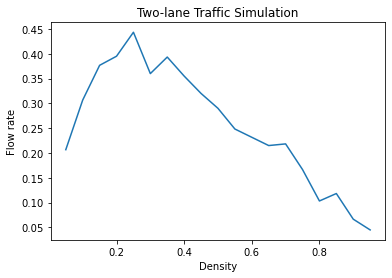

In [11]:
random.seed(100)
#calculate the flow rate for the two-lane model

flow_rate_2 = []
densities = []
time_step = 15

for i in range(1,20): #loop through the densities
    p = 0.05*i
    densities.append(p) #density
    p_all_flow_rates = [] #store the flow rates of each simulation for one density
   
    for j in range(20): #repeat simulation each density for 20 times
        T2 = TrafficSimulation_2lane(density = p) #simulation
        for i in range(time_step): #time step = 200
            T2.update()
        p_all_flow_rates.append(T2.flow_count/float(time_step))
    
    #average flow rate for one density
    flow_rate_2.append(sum(p_all_flow_rates)/20.0/2.0)

%matplotlib inline

plt.plot(densities,flow_rate_2)
plt.title("Two-lane Traffic Simulation")
plt.xlabel("Density")
plt.ylabel("Flow rate")
                  

UsageError: Line magic function `%plt.scatter(densities,flow_rate)` not found.


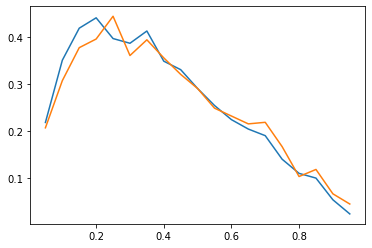

In [12]:
%matplotlib inline

plt.plot(densities,flow_rate)
plt.plot(densities,flow_rate_2)

%plt.scatter(densities,flow_rate)
%plt.scatter(densities,flow_rate_2)

plt.title("Two-lane Traffic Simulation")
plt.xlabel("Density")
plt.ylabel("Flow rate")

print ("For the one-lane model, the max flow rate is:", max(flow_rate_2)),
print ("and it's reached at the density of:",0.02*flow_rate_2.index(max(flow_rate_2)),".")

print ("For the two-lane model, the max flow rate is:", max(flow_rate)),
print ("and it's reached at the density of:",0.02*flow_rate.index(max(flow_rate)),".")
